In [4]:
from pygazeanalyser.edfreader import read_edf
#from pygazeanalyser.gazeplotter import parse_fixations
from pygazeanalyser import gazeplotter
import numpy
from matplotlib.pyplot import close
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import os
import glob
import statistics
import myutils

### " Import eye-tracking data "
eye = {} 
# data_path = '/Users/camillaucheomaenwereuzor/Desktop/Coding/Data analysis/sample/'
data_path = '/Volumes/OliversLab/CUEnwereuzor/InterruptAttn task 1/'
subjects = range(5,30)

for i in subjects:
    if i < 10:
        pattern = os.path.join(data_path, f"00{i}_*.asc")
        matches = glob.glob(pattern)
        # fallback if a file has no suffix
        if not matches:
            matches = glob.glob(os.path.join(data_path, f"00{i}.asc"))

        if not matches:
            print(f"No .asc file found for subject 00{i} in {data_path}")
            continue
    else:
        pattern = os.path.join(data_path, f"0{i}_*.asc")
        matches = glob.glob(pattern)
        # fallback if a file has no suffix
        if not matches:
            matches = glob.glob(os.path.join(data_path, f"0{i}.asc"))

        if not matches:
            print(f"No .asc file found for subject 0{i} in {data_path}")
            continue
    
    edf_file = matches[0]   # choose first match
    participant = read_edf(edf_file,'array_img_ONSET','array_img_OFFSET')
    experiment = {f"{i}": participant }
    eye.update(experiment)

No .asc file found for subject 007 in /Volumes/OliversLab/CUEnwereuzor/InterruptAttn task 1/


In [5]:
import ast

behav_data = {}   # dict keyed by subject id
for subj in subjects:
    # patterns to try (single- and double-zero padding)
    if subj >= 10:
        patterns = [f"0{subj}_*.csv"]
    if subj < 10:
        patterns = [f"00{subj}_*.csv"]

    matches = []
    for p in patterns:
        pattern = os.path.expanduser(os.path.join(data_path, p))
        print(f"Looking for: {pattern}")            # debug
        m = sorted(glob.glob(pattern))
        if m:
            matches = m
            print(f"  -> matched: {matches[0]}")
            break

    if not matches:
        print(f"No CSV found for subject {subj} (patterns tried: {patterns}) -- skipping")
        continue

    raw_data = pd.read_csv(matches[0])

    # # trim rows
    # if subj == 0:
    #     raw_data = raw_data.iloc[5:].reset_index(drop=True)
    # elif subj == 27:
    #     raw_data = raw_data.iloc[27:].reset_index(drop=True)
    # elif subj == 28:
    #     raw_data = raw_data.iloc[6:].reset_index(drop=True)
    # else:
    #     raw_data = raw_data.iloc[25:].reset_index(drop=True)
    raw_data = raw_data.dropna(subset=['correct_keypress']).reset_index(drop=True)

    raw_data["pix_target_posi"] = raw_data["pix_target_posi"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    raw_data["pix_distract_posi"] = raw_data["pix_distract_posi"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    behav_data[subj] = raw_data


Looking for: /Volumes/OliversLab/CUEnwereuzor/InterruptAttn task 1/005_*.csv
  -> matched: /Volumes/OliversLab/CUEnwereuzor/InterruptAttn task 1/005_mieke_task_2025-09-18_13h24.59.442.csv
Looking for: /Volumes/OliversLab/CUEnwereuzor/InterruptAttn task 1/006_*.csv
  -> matched: /Volumes/OliversLab/CUEnwereuzor/InterruptAttn task 1/006_mieke_task_2025-09-19_10h38.04.528.csv
Looking for: /Volumes/OliversLab/CUEnwereuzor/InterruptAttn task 1/007_*.csv
No CSV found for subject 7 (patterns tried: ['007_*.csv']) -- skipping
Looking for: /Volumes/OliversLab/CUEnwereuzor/InterruptAttn task 1/008_*.csv
  -> matched: /Volumes/OliversLab/CUEnwereuzor/InterruptAttn task 1/008_mieke_task_2025-09-19_15h04.37.755.csv
Looking for: /Volumes/OliversLab/CUEnwereuzor/InterruptAttn task 1/009_*.csv
  -> matched: /Volumes/OliversLab/CUEnwereuzor/InterruptAttn task 1/009_mieke_task_2025-09-22_10h34.46.956.csv
Looking for: /Volumes/OliversLab/CUEnwereuzor/InterruptAttn task 1/010_*.csv
  -> matched: /Volumes/

In [7]:
DISPSIZE = (1920,1080)
SCREENSIZE = (52.6,29.6) # (cm,cm)
SCREENDIST = 70.0 # cm
PXPERCM = numpy.mean([DISPSIZE[0]/SCREENSIZE[0],DISPSIZE[1]/SCREENSIZE[1]]) # px/cm

for subj in subjects:
# for subj in range(2):
	for trialnr in range(len(eye[f'{subj}'])):
			
			# load saccades, fixations, and accuracy data
			saccades = eye[f'{subj}'][trialnr]['events']['Esac'] # [starttime, endtime, duration, startx, starty, endx, endy]
			fixations = eye[f'{subj}'][trialnr]['events']['Efix'] # [starttime, endtime, duration, endx, endy]
			accuracy = behav_data[subj]['key_resp.corr'][trialnr]
			target_coord = behav_data[subj]['pix_target_posi'][trialnr]
			
			# paths
			imagefile = '/Users/camillaucheomaenwereuzor/Desktop/Experiments/mieke task/' + behav_data[subj]['array'][trialnr]
			# scatterfile = '/Users/camillaucheomaenwereuzor/Desktop/Coding/Data analysis/eyeplots/fixations/scatterfile' + str(trialnr)
			scanpathfile =  '/Users/camillaucheomaenwereuzor/Desktop/Coding/Data analysis/eyeplots/scanpath/' + str(subj) + '/scanpathfile' + str(trialnr)
			# heatmapfile = '/Users/camillaucheomaenwereuzor/Desktop/Coding/Data analysis'
			
			# fixations
			# gazeplotter.draw_fixations(fixations, DISPSIZE, imagefile=imagefile, durationsize=True, durationcolour=False, alpha=0.5, savefilename=scatterfile)
			# close()
			
			# scanpath
			# gazeplotter.draw_scanpath(fixations, saccades, DISPSIZE, imagefile=imagefile, alpha=0.5, savefilename=scanpathfile, accuracy=accuracy, target_coord=target_coord)
			# close()

			# heatmap - caterina suggested flipping the bckg images appropriately so that target position always appears in the same spot, and then drawing heatmap		
			# gazeplotter.draw_heatmap(fixations, DISPSIZE, imagefile=imagefile, durationweight=True, alpha=0.5, savefilename=heatmapfile)
			# close()

In [ ]:
screen_w = 1920
screen_h = 1080
fixcross_coord = [267.82, 0]

for subj in subjects:
# for subj in range(3,4):
	for trialnr in range(len(eye[f'{subj}'])):
			
		# load saccades, fixations, and accuracy data
		saccades = eye[f'{subj}'][trialnr]['events']['Esac'] # [starttime, endtime, duration, startx, starty, endx, endy]
		fixations = eye[f'{subj}'][trialnr]['events']['Efix'] # [starttime, endtime, duration, endx, endy]
		accuracy = behav_data[subj]['key_resp.corr'][trialnr]
		gaze_accuracy = behav_data[subj]['correct_gaze'][trialnr]

		if subj in [0, 1, 3]:
			target_coord = behav_data[subj]['pix_distract_posi'][trialnr]
			distract_coord = behav_data[subj]['pix_target_posi'][trialnr]
		else:
			target_coord = behav_data[subj]['pix_target_posi'][trialnr]
			distract_coord = behav_data[subj]['pix_distract_posi'][trialnr]
		
		el_target_coord = [(target_coord[0] + (screen_w/2)), ((screen_h/2) - target_coord[1])]
		el_distract_coord = [(distract_coord[0] + (screen_w/2)), ((screen_h/2) - distract_coord[1])]
		el_fixcross_coord = [(fixcross_coord[0] + (screen_w/2)), ((screen_h/2) - fixcross_coord[1])]
		# invert y coordinates of el_target_coord and el_distract_coord
		# el_target_coord[1] = screen_h - el_target_coord[1]
		# el_distract_coord[1] = screen_h - el_distract_coord[1]
		scanpathfile =  '/Users/camillaucheomaenwereuzor/Desktop/Coding/Data analysis/eyeplots/scanpath/' + str(subj) + '/scanpathfile' + str(trialnr)
		fix = gazeplotter.parse_fixations(fixations)

		fig, ax = plt.subplots()

		for i in range(len(fixations)):
			if myutils.eucli_dist(fix['x'][i], fix['y'][i], el_target_coord[0], el_target_coord[1]) <= myutils.deg2pix(5):
				ax.scatter(fix['x'][i],fix['y'][i], s=70, c='yellow', marker='o', cmap='jet', alpha=0.8, edgecolors='none')
			elif myutils.eucli_dist(fix['x'][i], fix['y'][i], el_distract_coord[0], el_distract_coord[1]) <= myutils.deg2pix(5):
				ax.scatter(fix['x'][i],fix['y'][i], s=70, c='pink', marker='o', cmap='jet', alpha=0.8, edgecolors='none')
			else:
				ax.scatter(fix['x'][i],fix['y'][i], s=70, c='blue', marker='o', cmap='jet', alpha=0.8, edgecolors='none')
		
		ax.scatter(el_fixcross_coord[0], el_fixcross_coord[1], s=100, c='black', marker='+', alpha=1, edgecolors='none')
		ax.scatter(el_target_coord[0], el_target_coord[1], s=200, c='orange', marker='*', alpha=1, edgecolors='none')
		ax.scatter(el_distract_coord[0], el_distract_coord[1], s=200, c='purple', marker='*', alpha=1, edgecolors='none')

		tgt_area = plt.Circle((el_target_coord[0], el_target_coord[1]), myutils.deg2pix(5), color='orange', fill=False, linestyle='dashed')
		dist_area = plt.Circle((el_distract_coord[0], el_distract_coord[1]), myutils.deg2pix(5), color='purple', fill=False, linestyle='dashed')
		ax.add_patch(tgt_area)
		ax.add_patch(dist_area)

		# draw arrows for saccades marking the start of the scanpath, order of saccades, and end of the last saccade
		for i in range(len(saccades)):
			if i == 0:
				ax.arrow(saccades[i][3], saccades[i][4], (saccades[i][5]-saccades[i][3]), (saccades[i][6]-saccades[i][4]), head_width=15, head_length=15, fc='green', ec='green', alpha=0.7, length_includes_head=True)
				ax.text(saccades[i][3], saccades[i][4]-20, 'start', fontsize=10, color='green', alpha=0.7)
			elif i == (len(saccades)-1):
				ax.arrow(saccades[i][3], saccades[i][4], (saccades[i][5]-saccades[i][3]), (saccades[i][6]-saccades[i][4]), head_width=15, head_length=15, fc='red', ec='red', alpha=0.7, length_includes_head=True)
				ax.text(saccades[i][5], saccades[i][6]+10, 'end', fontsize=10, color='red', alpha=0.7)
			else:
				ax.arrow(saccades[i][3], saccades[i][4], (saccades[i][5]-saccades[i][3]), (saccades[i][6]-saccades[i][4]), head_width=10, head_length=10, fc='black', ec='black', alpha=0.5, length_includes_head=True)
		
		# annotate fixation numbers
		for i in range(len(fixations)):
			ax.text(fix['x'][i]+10, fix['y'][i]+10, str(i+1), fontsize=12, color='black', alpha=0.7)
		
		# make the plot bigger and higher quality
		fig.set_size_inches(19.2, 10.8)
		fig.dpi = 100

		
		plt.xlim(0, 1920)
		plt.ylim(0, 1080)
		ax.invert_yaxis()
		ax.set_aspect('equal')
		plt.text(50, 200, f'Keypress: {accuracy}\nGaze: {gaze_accuracy}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))
		plt.title(f'Subject {subj}, Trial {trialnr}')
		
		fig.savefig(scanpathfile)
		close()



In [3]:
# calculate average n of fixations per trial - both for individual ppts and for sample average - also for salient vs nonsalient trials
group_nfix = []
group_nfix_sal = []
group_nfix_nonsal = []

for subj in subjects:
    nfix = []
    nfix_sal = []
    nfix_nonsal = []
    for trialnr in range(len(eye[f'{subj}'])):

        fixations = eye[f'{subj}'][trialnr]['events']['Efix']
        salience = behav_data[subj]['target_salient'][trialnr]

        fix = gazeplotter.parse_fixations(fixations)
        nfix.append(len(fix['dur']) - 1) # the -1 is to avoid counting the very first fixation, which is a carryover fixation on fixcross that started before array onset
        
        if salience == 1.0:
            nfix_sal.append(len(fix['dur']) - 1)
        else:
            nfix_nonsal.append(len(fix['dur']) - 1)

    avg_nfix = round((statistics.mean(nfix)), 2)
    avg_nfix_sal = round((statistics.mean(nfix_sal)), 2)
    avg_nfix_nonsal = round((statistics.mean(nfix_nonsal)), 2)

    group_nfix.append(avg_nfix)
    group_nfix_sal.append(avg_nfix_sal)
    group_nfix_nonsal.append(avg_nfix_nonsal)
    
    print(f'Ppt {subj} : Average num. of fixations per trial: {avg_nfix}; {avg_nfix_sal} salient, and {avg_nfix_nonsal} nonsalient')

group_avg_nfix = round((statistics.mean(group_nfix)), 2)
group_avg_nfix_sal = round((statistics.mean(group_nfix_sal)), 2)
group_avg_nfix_nonsal = round((statistics.mean(group_nfix_nonsal)), 2)
print(f'Group average num. of fixations per trial: {group_avg_nfix}; {group_avg_nfix_sal} salient, and {group_avg_nfix_nonsal} nonsalient')

Ppt 5 : Average num. of fixations per trial: 2.72; 2.36 salient, and 3.07 nonsalient
Ppt 6 : Average num. of fixations per trial: 3.85; 3.88 salient, and 3.83 nonsalient
Ppt 8 : Average num. of fixations per trial: 1.89; 1.51 salient, and 2.27 nonsalient
Ppt 9 : Average num. of fixations per trial: 2.14; 2.06 salient, and 2.23 nonsalient
Ppt 10 : Average num. of fixations per trial: 2.11; 1.88 salient, and 2.34 nonsalient
Ppt 11 : Average num. of fixations per trial: 2.39; 2.26 salient, and 2.52 nonsalient
Ppt 12 : Average num. of fixations per trial: 2.44; 2.14 salient, and 2.74 nonsalient
Ppt 13 : Average num. of fixations per trial: 3.06; 2.87 salient, and 3.26 nonsalient
Ppt 14 : Average num. of fixations per trial: 1.78; 1.64 salient, and 1.92 nonsalient
Ppt 15 : Average num. of fixations per trial: 4.29; 4.01 salient, and 4.56 nonsalient
Ppt 16 : Average num. of fixations per trial: 3.44; 2.97 salient, and 3.91 nonsalient
Ppt 17 : Average num. of fixations per trial: 2.44; 2.33 s

In [10]:
# print(eye['2'][11]['events']['msg'][0])
# print(eye['2'][11]['events']['msg'][-1])
# # print(eye['0'][2]['events']['Esac'][0])
# print(eye['2'][11]['events']['Efix'][-1])
# to calculate latency of first saccade or fixation in ms i can take the start value of either of those and subtract from it the timestamp of array onset
# but issue arises in cases where Ssac value of first sac in the list occurs BEFORE array onset (how does this happen? artifact of saccade that started before array onset?)
    # to go around this i could take the first item of saccade list ONLY if its end value is smaller than the first Sfix value 
    # - if not then i take the next item of saccade list that matches this condition
    # this seems convoluted BOOTS though

In [30]:
# saccades = eye[f'{subj}'][trialnr]['events']['Esac'] # [starttime, endtime, duration, startx, starty, endx, endy]
# fixations = eye[f'{subj}'][trialnr]['events']['Efix'] # [starttime, endtime, duration, endx, endy]
# accuracy = behav_data[subj]['key_resp.corr'][trialnr]
# trial_start = eye[f'{subj}'][trialnr]['events']['msg'][0][0]
# salience = behav_data[subj]['target_salient'][trialnr]
# post_interrupt = behav_data[subj]['is_interruption_trial'][trialnr]

screen_w = 1920
screen_h = 1080
fixcross_coord = [267.82, 0]
# # target_coord = ppt2['pix_target_posi'][0]
# # distract_coord = ppt2['pix_distract_posi'][0]
# target_coord = behav_data[subj]['pix_target_posi'][trialnr]
# distract_coord = behav_data[subj]['pix_distract_posi'][trialnr]
# # correct_index = numpy.where(behav_data[subj]['key_resp.corr'][trialnr] == 1)

def classify_gaze(fixations, saccades, fixcross_coord, target_coord, distract_coord, trial_start, trial_end, trial_dur):
    """
    Convert fixcross, target and distractor PsychoPy coordinates into EL coordinates,
    define interest areas in dva around those coordinates, 
    and classify fix and sac as being in any of those areas for appropriate analysis.
    
    Extract and store:
    - first saccade latency
    - latency of target fixation(s) + dwell time  + fixation count
    - latency of distractor fixation(s) + dwell time  + fixation count

    Arguments

    fixations       : a list of fixation ending events from a single trial

    saccades        : a list of saccade start and end events from a single trial

    fixcross_coord  : psychopy coordinates of fixation cross in pix

    target_coord    : psychopy coordinates of target in pix

    distract_coord  : psychopy coordinates of distractor in pix

    trial_start     : EL timestamp of search array onset

    trial_end       : EL timestamp of search array offset (upon keypress)

    Returns

    trialvars   : a dict containing extracted values per single trial
    """
    
    fix = gazeplotter.parse_fixations(fixations)
    sac = gazeplotter.parse_saccades(saccades)

    el_target_coord = [(target_coord[0] + (screen_w/2)), ((screen_h/2) - target_coord[1])]
    el_distract_coord = [(distract_coord[0] + (screen_w/2)), ((screen_h/2) - distract_coord[1])]
    el_fixcross_coord = [(fixcross_coord[0] + (screen_w/2)), ((screen_h/2) - fixcross_coord[1])]

    #### first saccade latency ================================
    first_sacc_latency = 0
    
    for i in range(len(saccades)):
        # consider as first saccade only where start coordinates are within 2.76dva (125pix) from fixcross 
        # AND end coordinates are more than 2.76dva from fixcross AND if latency is > 80ms
        if (myutils.eucli_dist(sac['start_x'][i], sac['start_y'][i], el_fixcross_coord[0], el_fixcross_coord[1]) <= myutils.deg2pix(2.76)) and \
            (myutils.eucli_dist(sac['end_x'][i], sac['end_y'][i], el_fixcross_coord[0], el_fixcross_coord[1]) > myutils.deg2pix(2.76)) and \
            (myutils.calc_latency(sac['stime'][i], trial_start) > 80): # and \
            # (len(first_sacc_latency) < 1): # only do this for the first saccade encountered that matches conditions (avoid accidentally taking saccades later in trial that pass by fixation)
        
            first_sacc_latency = int(myutils.calc_latency(sac['stime'][i], trial_start))   # save latency
            break

    #### latency of first sacc directed to item ================================
    first_sacc_to_item_latency = None
    for i in range(len(saccades)):
        # consider as first saccade only where start coordinates are within 2.76dva (125pix) from fixcross 
        # AND end coordinates are more than 2.76dva from fixcross AND if latency is > 80ms
        if (myutils.calc_latency(sac['stime'][i], trial_start) > 80):
            if (myutils.eucli_dist(sac['end_x'][i], sac['end_y'][i], el_target_coord[0], el_target_coord[1]) <= myutils.deg2pix(2.5)) or \
                (myutils.eucli_dist(sac['end_x'][i], sac['end_y'][i], el_distract_coord[0], el_distract_coord[1]) <= myutils.deg2pix(2.5)):
                # (len(first_sacc_latency) < 1): # only do this for the first saccade encountered that matches conditions (avoid accidentally taking saccades later in trial that pass by fixation)
            
                first_sacc_to_item_latency = int(myutils.calc_latency(sac['stime'][i], trial_start))   # save latency
                break

    #### target fixation latency + dwell time  + fix count ================================
    first_tgt_fix_latency = None # latency of very first fix on target
    last_tgt_fix_latency = None
    target_fix_dur = []
    avg_tgt_fix_dur = None
    n_target_fix = 0
    tgt_to_keypress = None

    on_tgt_fix = {}
    counter = 0

    prev_on_tgt = False
    cumulative_dur = 0

    for i in range(len(fixations)):
        if int(fix['stime'][i] - trial_start) >= first_sacc_latency:
            if myutils.eucli_dist(fix['x'][i], fix['y'][i], el_target_coord[0], el_target_coord[1]) <= myutils.deg2pix(2.5):
                inner_fix_dict = {counter: {
                    'x':int(fix['x'][i]),
                    'y':int(fix['y'][i]),
                    'dur':int(fix['dur'][i]),
                    'stime':int(fix['stime'][i]),
                    'etime':int(fix['etime'][i])
                    }}
                on_tgt_fix.update(inner_fix_dict)
                counter += 1

                if not prev_on_tgt:
                    n_target_fix += 1
                    cumulative_dur = int(fix['dur'][i])
                else:
                    cumulative_dur += int(fix['dur'][i])
                prev_on_tgt = True

            else:
                if prev_on_tgt:
                    target_fix_dur.append(cumulative_dur)
                    cumulative_dur = 0
                prev_on_tgt = False

            if i == max(range(len(fixations))) and prev_on_tgt and cumulative_dur > 0:
                    target_fix_dur.append(cumulative_dur)
    
    if target_fix_dur == []:
        target_fix_dur = None
    elif len(target_fix_dur) > 1:
        avg_tgt_fix_dur = int(statistics.mean(target_fix_dur))
    elif len(target_fix_dur) == 1:
        avg_tgt_fix_dur = target_fix_dur[0]

    for i in range(len(on_tgt_fix)):
        if i == 0:
            first_tgt_fix_latency = int(myutils.calc_latency(on_tgt_fix[i]['stime'], trial_start)) 
        
        if i == max(range(len(on_tgt_fix))):
            etime = int(on_tgt_fix[i]['etime'])
            diff = trial_end - etime
            if diff <= 500:
                last_tgt_fix_latency = int(myutils.calc_latency(on_tgt_fix[i]['stime'], trial_start))
                tgt_to_keypress = trial_end - on_tgt_fix[i]['stime']
    
    # --- Target Inspection Phase ---
    target_inspect_start = None
    target_inspect_end = None
    target_inspect_dur = None

    # Find the last fixation on target within 500ms of keypress
    last_idx = None
    for i in reversed(range(len(fix['x']))):
        on_target = myutils.eucli_dist(fix['x'][i], fix['y'][i], el_target_coord[0], el_target_coord[1]) <= myutils.deg2pix(2.5)
        if on_target:
            etime = int(fix['etime'][i])
            diff = trial_end - etime
            if diff <= 500:
                last_idx = i
                break

    if last_idx is not None:
        # Walk backwards to find the start of the inspection phase
        inspect_indices = [last_idx]
        for j in range(last_idx-1, -1, -1):
            on_target = myutils.eucli_dist(fix['x'][j], fix['y'][j], el_target_coord[0], el_target_coord[1]) <= myutils.deg2pix(2.5)
            if on_target:
                inspect_indices.append(j)
            else:
                break
        inspect_indices = sorted(inspect_indices)
        target_inspect_start = int(myutils.calc_latency(fix['stime'][inspect_indices[0]], trial_start))
        # target_inspect_end = int(myutils.calc_latency(fix['etime'][inspect_indices[-1]], trial_start))
        # target_inspect_dur = sum([int(fix['dur'][k]) for k in inspect_indices])
        target_inspect_dur = trial_dur - target_inspect_start


    #### distractor fixation latency + dwell time  + fix count ================================
    first_dist_fix_latency = None # latency of very first fix on distractor
    last_dist_fix_latency = None
    distract_fix_dur = []
    avg_dist_fix_dur = None
    n_distract_fix = 0
    dist_to_keypress = None

    on_dist_fix = {}
    dist_counter = 0

    prev_on_dist = False
    cumulative_dur = 0

    for i in range(len(fixations)):
        if int(fix['stime'][i] - trial_start) >= int(first_sacc_latency):
            if myutils.eucli_dist(fix['x'][i], fix['y'][i], el_distract_coord[0], el_distract_coord[1]) <= myutils.deg2pix(2.5):
                inner_distfix_dict = {dist_counter: {
                    'x':int(fix['x'][i]),
                    'y':int(fix['y'][i]),
                    'dur':int(fix['dur'][i]),
                    'stime':int(fix['stime'][i]),
                    'etime':int(fix['etime'][i])
                    }}

                on_dist_fix.update(inner_distfix_dict)
                dist_counter += 1

                if not prev_on_dist:
                    n_distract_fix += 1
                    cumulative_dur = int(fix['dur'][i])
                else:
                    cumulative_dur += int(fix['dur'][i])
                prev_on_dist = True

            else:
                if prev_on_dist:
                    distract_fix_dur.append(cumulative_dur)
                    cumulative_dur = 0
                prev_on_dist = False

            if i == max(range(len(fixations))) and prev_on_dist and cumulative_dur > 0:
                    distract_fix_dur.append(cumulative_dur)
    
    if distract_fix_dur == []:
        distract_fix_dur = None
    elif len(distract_fix_dur) > 1:
        avg_dist_fix_dur = int(statistics.mean(distract_fix_dur))
    elif len(distract_fix_dur) == 1:
        avg_dist_fix_dur = distract_fix_dur[0]
    
    if on_dist_fix:
        for i in range(len(on_dist_fix)):
            if i == 0:
                first_dist_fix_latency = int(myutils.calc_latency(on_dist_fix[i]['stime'], trial_start)) 
            
            if i == max(range(len(on_dist_fix))):
                etime = int(on_dist_fix[i]['etime'])
                diff = trial_end - etime
                if diff <= trial_dur:
                    last_dist_fix_latency = int(myutils.calc_latency(on_dist_fix[i]['stime'], trial_start))
                    dist_to_keypress = trial_end - on_dist_fix[i]['stime']
    
    #### classify trial as target first or distractor first ================================
    first_fix_latency = None
    first_fix_x = None
    first_fix_y = None
    for i in range(len(fixations)):
        if int(fix['stime'][i] - trial_start) >= int(first_sacc_latency):
            first_fix_latency = int(fix['stime'][i] - trial_start)
            first_fix_x = fix['x'][i]
            first_fix_y = fix['y'][i]
            break
    
    nontgt_first = 0
    singleton_first = 0

    if first_fix_latency:
        if not myutils.eucli_dist(first_fix_x, first_fix_y, el_distract_coord[0], el_distract_coord[1]) <= myutils.deg2pix(2.5) and \
            not myutils.eucli_dist(first_fix_x, first_fix_y, el_target_coord[0], el_target_coord[1]) <= myutils.deg2pix(2.5):
            nontgt_first = 1
            singleton_first = 0
        elif myutils.eucli_dist(first_fix_x, first_fix_y, el_distract_coord[0], el_distract_coord[1]) <= myutils.deg2pix(2.5) or \
            myutils.eucli_dist(first_fix_x, first_fix_y, el_target_coord[0], el_target_coord[1]) <= myutils.deg2pix(2.5):
            singleton_first = 1
            nontgt_first = 0
    else:
        nontgt_first = 0
        singleton_first = 0

    target_first = 0
    if first_tgt_fix_latency and first_dist_fix_latency:
        if first_tgt_fix_latency < first_dist_fix_latency:
            target_first = int(1)
        else:
            target_first = int(0)
    elif first_tgt_fix_latency and not first_dist_fix_latency:
        target_first = int(1)
    elif not first_tgt_fix_latency and first_dist_fix_latency:
        target_first = int(0)
    
    target_last = 0
    if last_tgt_fix_latency and last_dist_fix_latency:
        if last_tgt_fix_latency > last_dist_fix_latency:
            target_last = int(1)
        else:
            target_last = int(0)
    elif last_tgt_fix_latency and not last_dist_fix_latency:
        target_last = int(1)
    elif not last_tgt_fix_latency and last_dist_fix_latency:
        target_last = int(0)

    #### collect all variables for each trial and append in dataframe ================================
    trialvars = {'trial_nr':trialnr,'ppt':subj,'salience':salience,'interruption':post_interrupt, 'since_last_interr':since_last_interr, 'until_next_interr':until_next_interr,
                 'interrupt_len':interrupt_len, 'interrupt_dur':interrupt_dur, 'interrupt_fdbk':interrupt_fdbk, 'resumption_lag':resumption_lag, 'goal_revisited':goal_revisited,
                 'accuracy':accuracy, 'gaze_accuracy':gaze_accuracy, 'rt':rt,
                 'trial_dur':trial_dur, 'first_sacc_latency':first_sacc_latency, 'first_sacc_to_item_latency':first_sacc_to_item_latency,
                 'first_tgt_fix_latency':first_tgt_fix_latency, 'target_fix_dur':target_fix_dur, 'avg_tgt_fix_dur':avg_tgt_fix_dur, 'n_target_fix':n_target_fix, 'all_target_fix':len(on_tgt_fix),
                 'last_tgt_fix_latency':last_tgt_fix_latency, 'tgt_to_keypress':tgt_to_keypress,
                 'first_distract_fix_latency':first_dist_fix_latency, 'distract_fix_dur':distract_fix_dur, 'avg_dist_fix_dur':avg_dist_fix_dur, 'n_distract_fix':n_distract_fix, 'all_distract_fix':len(on_dist_fix),
                 'last_dist_fix_latency':last_dist_fix_latency, 'dist_to_keypress':dist_to_keypress,
                 'tot_n_fix':n_target_fix + n_distract_fix,
                 'target_first':target_first, 'target_last':target_last, 'nontgt_first':nontgt_first, 'singleton_first':singleton_first,
                 'target_inspect_start':target_inspect_start, 'target_inspect_dur':target_inspect_dur}

    return trialvars


alldata = []
for subj in subjects:
    if subj == 7:
        continue
    
    trialdata = []

    for trialnr in range(len(eye[f'{subj}'])):
        
        saccades = eye[f'{subj}'][trialnr]['events']['Esac']
        fixations = eye[f'{subj}'][trialnr]['events']['Efix']

        rt = round(((behav_data[subj]['key_resp.rt'][trialnr])*1000), 0) # convert to ms
        accuracy = behav_data[subj]['key_resp.corr'][trialnr]
        gaze_accuracy = behav_data[subj]['correct_gaze'][trialnr]
        salience = behav_data[subj]['target_salient'][trialnr]
        post_interrupt = behav_data[subj]['is_interruption_trial'][trialnr]

        trial_start = eye[f'{subj}'][trialnr]['events']['msg'][0][0]
        # trial_end = eye[f'{subj}'][trialnr]['events']['msg'][-1][0]
        trial_end = trial_start + rt
        trial_dur = trial_end - trial_start

        since_last_interr = behav_data[subj]['since_last_interr'][trialnr]
        until_next_interr = behav_data[subj]['until_next_interr'][trialnr]
        interrupt_len = behav_data[subj]['interruption_duration'][trialnr]
        interrupt_start = behav_data[subj]['interrupt.started'][trialnr]
        interrupt_end = behav_data[subj]['interrupt.stopped'][trialnr]
        interrupt_dur = interrupt_end - interrupt_start # in seconds
        interrupt_fdbk = behav_data[subj]['interruption_fdbk'][trialnr]
        resume_stopped = behav_data[subj]['resume.stopped'][trialnr]
        fix_stopped = behav_data[subj]['fix.stopped'][trialnr]
        resumption_lag = fix_stopped - resume_stopped # in seconds

        goal_revisited = behav_data[subj]['goal_revisited'][trialnr]

        if subj in [0, 1, 3]:
            target_coord = behav_data[subj]['pix_distract_posi'][trialnr]
            distract_coord = behav_data[subj]['pix_target_posi'][trialnr]
        else:
            target_coord = behav_data[subj]['pix_target_posi'][trialnr]
            distract_coord = behav_data[subj]['pix_distract_posi'][trialnr]
        
        # if not (isinstance(target_coord, (list, tuple)) and len(target_coord) >= 2):
        #     print(f"Skipping subj {subj} trial {trialnr}: bad target_coord = {target_coord!r}")
        #     continue
        # if not (isinstance(distract_coord, (list, tuple)) and len(distract_coord) >= 2):
        #     print(f"Skipping subj {subj} trial {trialnr}: bad distract_coord = {distract_coord!r}")
        #     continue

        trialvars = classify_gaze(fixations=fixations, saccades=saccades, 
                                  fixcross_coord=fixcross_coord, target_coord=target_coord, distract_coord=distract_coord, 
                                  trial_start=trial_start, trial_end=trial_end, trial_dur=trial_dur)

        trialdata.append(trialvars)
    
    trialdf = pd.DataFrame(trialdata)
    alldata.append(trialdf)
alldata = pd.concat(alldata, ignore_index=True)

# save alldata to csv
alldata.to_csv('/Users/camillaucheomaenwereuzor/Desktop/Coding/Data analysis/alldata_raw.csv', index=False)


In [31]:
print(f'Proportion of trials with first fixation on a singleton: {round((alldata["singleton_first"].sum() / len(alldata)), 3)}')

Proportion of trials with first fixation on a singleton: 0.853



      Median distance from sinngleton: 0.7 dva
      Mean distance from singleton: 0.86 dva
      Median normalized distance from singleton: 0.6999860002799944 dva
      Mean normalized distance from singleton: 0.46358536924574667 dva

      Proportion of fixations within 2.5 dva of singleton: 0.9782
      


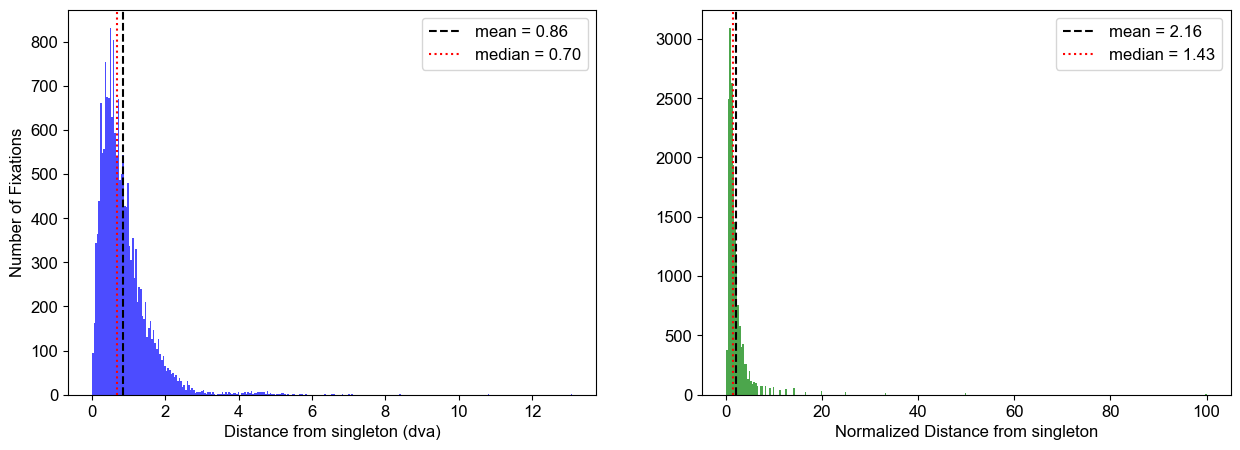

In [64]:
screen_w = 1920
screen_h = 1080
fixcross_coord = [267.82, 0]

aoidata = []
for subj in subjects:
    if subj == 7:
        continue

    trialaoi = []

    for trialnr in range(len(eye[f'{subj}'])):
        
        saccades = eye[f'{subj}'][trialnr]['events']['Esac']
        fixations = eye[f'{subj}'][trialnr]['events']['Efix']
        
        fix = gazeplotter.parse_fixations(fixations)
        sac = gazeplotter.parse_saccades(saccades)

        target_coord = behav_data[subj]['pix_target_posi'][trialnr]
        distract_coord = behav_data[subj]['pix_distract_posi'][trialnr]

        el_target_coord = [(target_coord[0] + (screen_w/2)), ((screen_h/2) - target_coord[1])]
        el_distract_coord = [(distract_coord[0] + (screen_w/2)), ((screen_h/2) - distract_coord[1])]
        el_fixcross_coord = [(fixcross_coord[0] + (screen_w/2)), ((screen_h/2) - fixcross_coord[1])]

        distance = None
        nearest = 'nothing'
        aoi = None

        for i in range(len(fixations)):
            if myutils.eucli_dist(fix['x'][i], fix['y'][i], el_fixcross_coord[0], el_fixcross_coord[1]) > myutils.deg2pix(2.76):
                
                if myutils.eucli_dist(fix['x'][i], fix['y'][i], el_target_coord[0], el_target_coord[1]) < myutils.eucli_dist(fix['x'][i], fix['y'][i], el_distract_coord[0], el_distract_coord[1]):
                    nearest = 'target'
                elif myutils.eucli_dist(fix['x'][i], fix['y'][i], el_distract_coord[0], el_distract_coord[1]) < myutils.eucli_dist(fix['x'][i], fix['y'][i], el_target_coord[0], el_target_coord[1]):
                    nearest = 'distractor'
                else:
                    nearest = 'nontarget'

                if nearest == 'target':
                    distance = myutils.pix2deg(myutils.eucli_dist(fix['x'][i], fix['y'][i], el_target_coord[0], el_target_coord[1]))
                elif nearest == 'distractor':
                    distance = myutils.pix2deg(myutils.eucli_dist(fix['x'][i], fix['y'][i], el_distract_coord[0], el_distract_coord[1]))
                
                if myutils.eucli_dist(fix['x'][i], fix['y'][i], el_target_coord[0], el_target_coord[1]) <= myutils.deg2pix(2.5) or \
                    myutils.eucli_dist(fix['x'][i], fix['y'][i], el_distract_coord[0], el_distract_coord[1]) <= myutils.deg2pix(2.5):
                    aoi = 1
                else:
                    aoi = 0
            
            aoidict = {'trial_nr':trialnr,'ppt':subj,'distance':distance,'nearest':nearest,'aoi':aoi}

        trialaoi.append(aoidict)
    aoidf = pd.DataFrame(trialaoi)
    aoidata.append(aoidf)
aoidata = pd.concat(aoidata, ignore_index=True)


fig, ax = plt.subplots(1,2, figsize=(15, 5))

ax[0].hist(aoidata['distance'].dropna(), bins=300, color='blue', alpha=0.7)
ax[0].axvline(aoidata['distance'].dropna().mean(), color='k', linestyle='--', label=f"mean = {aoidata['distance'].dropna().mean():.2f}")
ax[0].axvline(aoidata['distance'].dropna().median(), color='r', linestyle=':', label=f"median = {aoidata['distance'].dropna().median():.2f}")
ax[0].set_xlabel('Distance from singleton (dva)')
ax[0].set_ylabel('Number of Fixations')
ax[0].legend()

data_norm = 1 / aoidata['distance'].dropna()
ax[1].hist(data_norm, bins=300, color='green', alpha=0.7)
ax[1].axvline(data_norm.mean(), color='k', linestyle='--', label=f"mean = {data_norm.mean():.2f}")
ax[1].axvline(data_norm.median(), color='r', linestyle=':', label=f"median = {data_norm.median():.2f}")
ax[1].set_xlabel('Normalized Distance from singleton')
ax[1].legend()

print(f"""
      Median distance from sinngleton: {round(aoidata["distance"].dropna().median(), 2)} dva
      Mean distance from singleton: {round(aoidata["distance"].dropna().mean(), 2)} dva
      Median normalized distance from singleton: {1 / round(data_norm.median(), 4)} dva
      Mean normalized distance from singleton: {1 / round(data_norm.mean(), 4)} dva

      Proportion of fixations within 2.5 dva of singleton: {round((aoidata['aoi'].sum() / len(aoidata)), 4)}
      """)

In [5]:
start = eye[f'{5}'][0]['events']['msg'][0][0]
end = eye[f'{5}'][0]['events']['msg'][-1][0]
dur = end - start
rt = round(((behav_data[5]['key_resp.rt'][0])*1000), 0)
print(start)
print(end)
print(rt)
print(dur)
print(dur - rt)
print((end-rt) - start)
new_end = int(start + rt)
print(new_end)
print(new_end - start)


1714387
1717788
3271.0
3401
130.0
130.0
1717658
3271


In [65]:
# DATA CLEANING ===============================
# exclude participants with overall accuracy < 60%
min_acc = 0.60
acc_by_ppt = alldata.groupby('ppt')['accuracy'].mean()
exclude_ppts = acc_by_ppt[acc_by_ppt < min_acc].index.tolist()
keep_ppts = acc_by_ppt[acc_by_ppt >= min_acc].index.tolist()
print(f"Excluding participants with accuracy < {min_acc*100:.0f}%: {exclude_ppts}")

# exclude participants with accuracy < 80% on non-interruption trials
min_acc = 0.80
acc_by_ppt = alldata[alldata['interruption'] == 0].groupby('ppt')['accuracy'].mean()
exclude_ppts = acc_by_ppt[acc_by_ppt < min_acc].index.tolist()
keep_ppts = acc_by_ppt[acc_by_ppt >= min_acc].index.tolist()
print(f"Excluding participants with accuracy < {min_acc*100:.0f}% on non-interruption trials: {exclude_ppts}")

# filter alldata to keep only acceptable participants
alldata = alldata[alldata['ppt'].isin(keep_ppts)].reset_index(drop=True)

# clean data for rt analysis (no error trials) 
rt_data = alldata[
    (alldata['rt'] >= 0.3) &    
    (alldata['rt'].notna()) &    
    (alldata['accuracy'] == 1) &    
    (alldata['goal_revisited'] == 0) &
    (alldata['first_sacc_latency'] >= 80) &
    (alldata['singleton_first'] == 1)
]

print(len(alldata) - len(rt_data), "trials removed during RT data cleaning")

# clean data for accuracy analysis (error trials included)
acc_data = alldata[
    (alldata['rt'] >= 0.3) &    
    (alldata['rt'].notna()) &    
    (alldata['goal_revisited'] == 0) &
    (alldata['first_sacc_latency'] >= 80) &
    (alldata['singleton_first'] == 1)
]

print(len(alldata) - len(acc_data), "trials removed during accuracy data cleaning")


Excluding participants with accuracy < 60%: []
Excluding participants with accuracy < 80% on non-interruption trials: []
2846 trials removed during RT data cleaning
2600 trials removed during accuracy data cleaning


n = 1440, mean = 5.388s, median = 4.841s, std = 2.417s


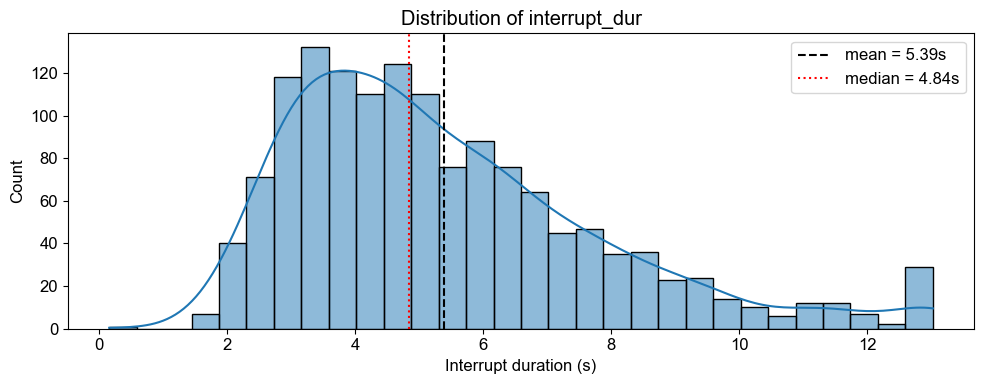

n = 1440, mean = 0.227, median = 0.207, std = 0.186


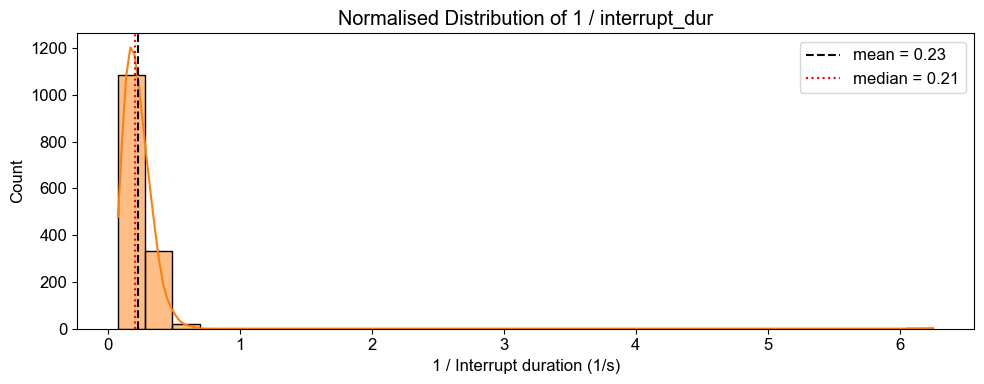

5th percentile of normalised data: 2.518
95th percentile of normalised data: 0.397
Corresponding interrupt_dur at 5th percentile: 0.397s
Corresponding interrupt_dur at 95th percentile: 2.518s
Participants excluded based on interrupt_dur criteria: []


In [33]:
# plot distribution of interrupt_dur

import seaborn as sns

# use alldata produced above
data = alldata['interrupt_dur'].dropna()

print(f"n = {len(data)}, mean = {data.mean():.3f}s, median = {data.median():.3f}s, std = {data.std():.3f}s")

plt.figure(figsize=(10,4))
sns.histplot(data, bins=30, kde=True, color='C0')
plt.axvline(data.mean(), color='k', linestyle='--', label=f"mean = {data.mean():.2f}s")
plt.axvline(data.median(), color='r', linestyle=':', label=f"median = {data.median():.2f}s")
plt.xlabel('Interrupt duration (s)')
plt.title('Distribution of interrupt_dur')
plt.legend()
plt.tight_layout()
plt.show()

# normalise distribution by taking 1/interrupt_dur
data_norm = 1 / data
print(f"n = {len(data_norm)}, mean = {data_norm.mean():.3f}, median = {data_norm.median():.3f}, std = {data_norm.std():.3f}")
# plot normalised distribution
plt.figure(figsize=(10,4))
sns.histplot(data_norm, bins=30, kde=True, color='C1')
plt.axvline(data_norm.mean(), color='k', linestyle='--', label=f"mean = {data_norm.mean():.2f}")
plt.axvline(data_norm.median(), color='r', linestyle=':', label=f"median = {data_norm.median():.2f}")
plt.xlabel('1 / Interrupt duration (1/s)')
plt.title('Normalised Distribution of 1 / interrupt_dur')
plt.legend()
plt.tight_layout()
plt.show()

# find 5th and 95th percentile of normalised data
percentile_5 = data.quantile(0.05)
percentile_95 = data_norm.quantile(0.95)
print(f"5th percentile of normalised data: {percentile_5:.3f}")
print(f"95th percentile of normalised data: {percentile_95:.3f}")
# transform back to unnormalised interrupt_dur -- why do these numbers seem inverted?
interrupt_dur_5th_percentile = 1 / percentile_5
interrupt_dur_95th_percentile = 1 / percentile_95
print(f"Corresponding interrupt_dur at 5th percentile: {interrupt_dur_5th_percentile:.3f}s")
print(f"Corresponding interrupt_dur at 95th percentile: {interrupt_dur_95th_percentile:.3f}s")

# exclude ppt if ≥ 30% of interrupt_dur is below percentile_5 
ppts_to_exclude = []
for ppt in alldata['ppt'].unique():
    ppt_data = alldata[alldata['ppt'] == ppt]
    n_trials = len(ppt_data)
    n_below_5th = len(ppt_data[ppt_data['interrupt_dur'] < interrupt_dur_5th_percentile])
    proportion_below_5th = n_below_5th / n_trials
    if proportion_below_5th >= 0.30:
        ppts_to_exclude.append(ppt)
        print(f"Excluding ppt {ppt} with {proportion_below_5th*100:.2f}% of trials below 5th percentile interrupt_dur")

# filter alldata to keep only acceptable participants
if ppts_to_exclude is not []:
    rt_data = rt_data[~rt_data['ppt'].isin(ppts_to_exclude)]
print(f"Participants excluded based on interrupt_dur criteria: {ppts_to_exclude}")


In [34]:
# save cleaned datasets to csv
rt_data.to_csv('/Users/camillaucheomaenwereuzor/Desktop/Coding/Data analysis/rt_data_clean.csv', index=False)
acc_data.to_csv('/Users/camillaucheomaenwereuzor/Desktop/Coding/Data analysis/acc_data_clean.csv', index=False)

In [35]:
#### Descriptive stats ================================
from myutils import sum_stats_grouped
from myutils import filtered_stats_grouped

per_ppt_by_sal = rt_data.groupby(['salience','ppt'])['rt'].mean()
mean_of_means_by_sal = per_ppt_by_sal.groupby('salience').mean()

print(f"""
First saccade to item latency grouped by salience:
{sum_stats_grouped(rt_data, 'first_sacc_to_item_latency', 'salience')}

First saccade to item latency grouped by pre vs post interruption:
{sum_stats_grouped(rt_data, 'first_sacc_to_item_latency', 'interruption')}

First saccade to item latency grouped by participant:
{sum_stats_grouped(rt_data, 'first_sacc_to_item_latency', 'ppt')}
===
Proportion of target first trials:
{(round(rt_data['target_first'].mean(), 4))*100}%
    Salient: {(round(sum_stats_grouped(rt_data, 'target_first', 'salience')['mean'][1], 4))*100}%
    Nonsalient: {(round(sum_stats_grouped(rt_data, 'target_first', 'salience')['mean'][0], 4))*100}%

Proportion of target last trials:
{(round(rt_data['target_last'].mean(), 4))*100}%
    Salient: {(round(sum_stats_grouped(rt_data, 'target_last', 'salience')['mean'][1], 4))*100}%
    Nonsalient: {(round(sum_stats_grouped(rt_data, 'target_last', 'salience')['mean'][0], 4))*100}%
===
Proportion of trials with no target fixations:
{(round((len(rt_data[rt_data['n_target_fix'] == 0]) / len(rt_data)), 4))*100}%
    Salient: {(round((len(rt_data[(rt_data['n_target_fix'] == 0) & (rt_data['salience'] == 1)]) / len(rt_data[rt_data['salience'] == 1])), 4))*100}%
    Nonsalient: {(round((len(rt_data[(rt_data['n_target_fix'] == 0) & (rt_data['salience'] == 0)]) / len(rt_data[rt_data['salience'] == 0])), 4))*100}%

Proportion of trials with no distractor fixations:
{(round((len(rt_data[rt_data['n_distract_fix'] == 0]) / len(rt_data)), 4))*100}%
    Salient: {(round((len(rt_data[(rt_data['n_distract_fix'] == 0) & (rt_data['salience'] == 1)]) / len(rt_data[rt_data['salience'] == 1])), 4))*100}%
    Nonsalient: {(round((len(rt_data[(rt_data['n_distract_fix'] == 0) & (rt_data['salience'] == 0)]) / len(rt_data[rt_data['salience'] == 0])), 4))*100}%

Average number of target fixations:
{round(rt_data['n_target_fix'].mean(), 2)}
    Salient: {round(sum_stats_grouped(rt_data, 'n_target_fix', 'salience')['mean'][1], 2)}
    Nonsalient: {round(sum_stats_grouped(rt_data, 'n_target_fix', 'salience')['mean'][0], 2)}

Average number of distractor fixations:
{round(rt_data['n_distract_fix'].mean(), 2)}
    Salient: {round(sum_stats_grouped(rt_data, 'n_distract_fix', 'salience')['mean'][1], 2)}
    Nonsalient: {round(sum_stats_grouped(rt_data, 'n_distract_fix', 'salience')['mean'][0], 2)}

Average target fixation duration:
{round(rt_data['avg_tgt_fix_dur'].mean(), 2)} ms
    Salient: {round(sum_stats_grouped(rt_data, 'avg_tgt_fix_dur', 'salience')['mean'][1], 2)} ms (SD = {round(sum_stats_grouped(rt_data, 'avg_tgt_fix_dur', 'salience')['std'][1], 2)})
    Nonsalient: {round(sum_stats_grouped(rt_data, 'avg_tgt_fix_dur', 'salience')['mean'][0], 2)} ms (SD = {round(sum_stats_grouped(rt_data, 'avg_tgt_fix_dur', 'salience')['std'][0], 2)})

Average target inspection duration:
{round(rt_data['target_inspect_dur'].mean(), 2)} ms
    Salient: {round(sum_stats_grouped(rt_data, 'target_inspect_dur', 'salience')['mean'][1], 2)} ms (SD = {round(sum_stats_grouped(rt_data, 'target_inspect_dur', 'salience')['std'][1], 2)})
    Nonsalient: {round(sum_stats_grouped(rt_data, 'target_inspect_dur', 'salience')['mean'][0], 2)} ms (SD = {round(sum_stats_grouped(rt_data, 'target_inspect_dur', 'salience')['std'][0], 2)})

Average distractor fixation duration:
{round(rt_data['avg_dist_fix_dur'].mean(), 2)} ms
    Salient: {round(sum_stats_grouped(rt_data, 'avg_dist_fix_dur', 'salience')['mean'][1], 2)} ms (SD = {round(sum_stats_grouped(rt_data, 'avg_dist_fix_dur', 'salience')['std'][1], 2)})
    Nonsalient: {round(sum_stats_grouped(rt_data, 'avg_dist_fix_dur', 'salience')['mean'][0], 2)} ms (SD = {round(sum_stats_grouped(rt_data, 'avg_dist_fix_dur', 'salience')['std'][0], 2)})

Average time diff between last target fixation and keypress:
{filtered_stats_grouped(rt_data, 'tgt_to_keypress', 'salience', 'target_last', 1, group=True)}

Average time diff between trial onset and start of target inspection:
{filtered_stats_grouped(rt_data, 'target_inspect_start', 'salience', 'target_last', 1, group=True)}

""")



First saccade to item latency grouped by salience:
          count        mean         std       sem
salience                                         
0.0        8100  238.105679  111.791143  1.242124
1.0        8110  237.320592  108.883063  1.209066

First saccade to item latency grouped by pre vs post interruption:
              count        mean         std       sem
interruption                                         
0.0           14817  234.575690  104.215211  0.856152
1.0            1393  271.082556  157.985426  4.232934

First saccade to item latency grouped by participant:
     count        mean         std       sem
ppt                                         
5      685  196.194161   59.806794  2.285100
6      678  233.064897   65.894360  2.530658
8      686  210.846939   73.852278  2.819693
9      652  223.156442  101.764238  3.985395
10     706  239.501416   76.983433  2.897310
11     634  230.537855  107.003341  4.249646
12     694  262.837176  105.084688  3.988960
13  

Text(0.02, 0.5, 'Latency of first saccade from fixation (ms)')

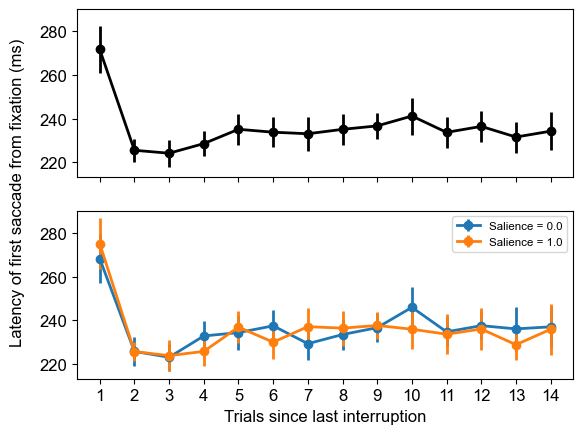

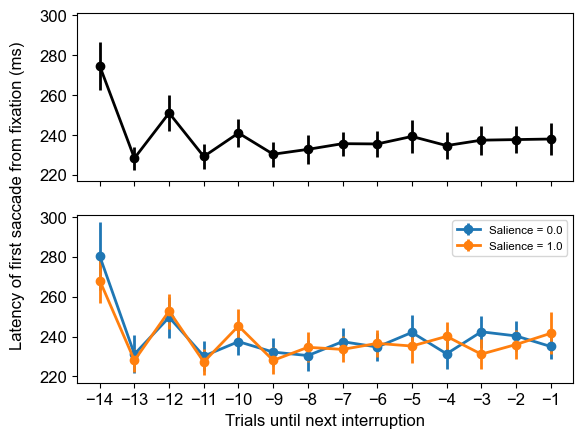

In [36]:
def sum_stats_grouped(df, target_var, group_var):
    """
    Returns mean, std, and count of a target variable grouped by a group variable,
    dropping NAs in the target variable.

    Arguments:
    
    df:               pandas df

    target_var:  column to summarize

    group_var:   column to group by

    Returns:

    summary:    a pandas df with count, mean, std and sem for each group
    """
    # Drop rows where the target variable is missing
    df_clean = df[df[target_var].notna()]

    # Group and calculate stats
    summary = df_clean.groupby(group_var)[target_var].agg(['count', 'mean', 'std', 'sem'])

    return summary

#### PLOT FIRST SACC LATENCY ================================
fig, ax = plt.subplots(2,1, sharex=True, sharey=True)

per_ppt = rt_data.groupby(['ppt','since_last_interr'])['first_sacc_to_item_latency'].mean().reset_index()

group_mean = per_ppt.groupby('since_last_interr')['first_sacc_to_item_latency'].mean()
group_sem  = per_ppt.groupby('since_last_interr')['first_sacc_to_item_latency'].sem()  # sem across ppt means

# grouped_all = sum_stats_grouped(rt_data, 'first_sacc_to_item_latency', 'since_last_interr')
# grouped_all = rt_data.groupby(['ppt', 'since_last_interr'])['first_sacc_to_item_latency'].agg(['count', 'mean', 'std'])

# ax[0].plot(grouped_all['mean'], marker='o', linestyle='-', color='black', linewidth=2, label='group mean')
ax[0].set_xticks(range(1,15))
ax[0].errorbar(x=group_mean.index, y=group_mean.values, yerr=group_sem.values, marker='o', linestyle='-', color='black', linewidth=2, label='group mean')

per_ppt_by_sal = rt_data.groupby(['salience','ppt','since_last_interr'])['first_sacc_to_item_latency'].mean().reset_index()

for salience_value in sorted(rt_data['salience'].unique()):
    subset = per_ppt_by_sal[per_ppt_by_sal['salience'] == salience_value]
    mean_by_bin = subset.groupby('since_last_interr')['first_sacc_to_item_latency'].mean()
    sem_by_bin  = subset.groupby('since_last_interr')['first_sacc_to_item_latency'].sem()
    ax[1].errorbar(x=mean_by_bin.index, y=mean_by_bin.values, yerr=sem_by_bin.values, marker='o', linestyle='-', linewidth=2, label=f'Salience = {salience_value}')

# for salience_value in rt_data['salience'].unique():
#     subset = rt_data[rt_data['salience'] == salience_value]
#     grouped = sum_stats_grouped(subset, 'first_sacc_to_item_latency', 'since_last_interr')
#     ax[1].errorbar(x=grouped.index, y=grouped['mean'], yerr=grouped['sem'], marker='o', linestyle='-', linewidth=2, label=f'Salience = {salience_value}')
#     # ax[1].plot(grouped['mean'], marker='o', linestyle='-', linewidth=2)

ax[1].set_xlabel('Trials since last interruption')
# ax[1].set_ylabel('Latency of first saccade from fixation (ms)')
ax[1].set_xticks(range(1,15))
ax[1].legend(fontsize='x-small')
fig.text(0.02, 0.5, 'Latency of first saccade from fixation (ms)', va='center', rotation='vertical')


# ===========================================================

fig, ax = plt.subplots(2,1, sharex=True, sharey=True)

per_ppt = rt_data.groupby(['ppt','until_next_interr'])['first_sacc_to_item_latency'].mean().reset_index()

group_mean = per_ppt.groupby('until_next_interr')['first_sacc_to_item_latency'].mean()
group_sem  = per_ppt.groupby('until_next_interr')['first_sacc_to_item_latency'].sem()

ax[0].errorbar(x=group_mean.index, y=group_mean.values, yerr=group_sem.values, marker='o', linestyle='-', color='black', linewidth=2, label='group mean')

per_ppt_by_sal = rt_data.groupby(['salience','ppt','until_next_interr'])['first_sacc_to_item_latency'].mean().reset_index()

for salience_value in sorted(rt_data['salience'].unique()):
    subset = per_ppt_by_sal[per_ppt_by_sal['salience'] == salience_value]
    mean_by_bin = subset.groupby('until_next_interr')['first_sacc_to_item_latency'].mean()
    sem_by_bin  = subset.groupby('until_next_interr')['first_sacc_to_item_latency'].sem()
    ax[1].errorbar(x=mean_by_bin.index, y=mean_by_bin.values, yerr=sem_by_bin.values, marker='o', linestyle='-', linewidth=2, label=f'Salience = {salience_value}')

ax[1].set_xlabel('Trials until next interruption')
# ax[1].set_ylabel('Latency of first saccade from fixation (ms)')
ax[1].set_xticks(range(-14,0))
ax[1].legend(fontsize='x-small')
fig.text(0.02, 0.5, 'Latency of first saccade from fixation (ms)', va='center', rotation='vertical')

Text(0.02, 0.5, 'Latency of start of target inspection (ms)')

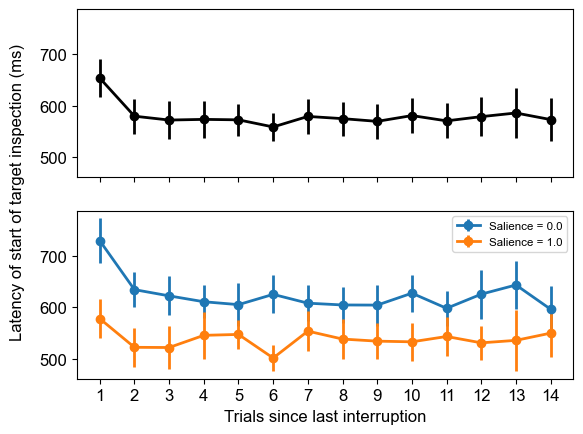

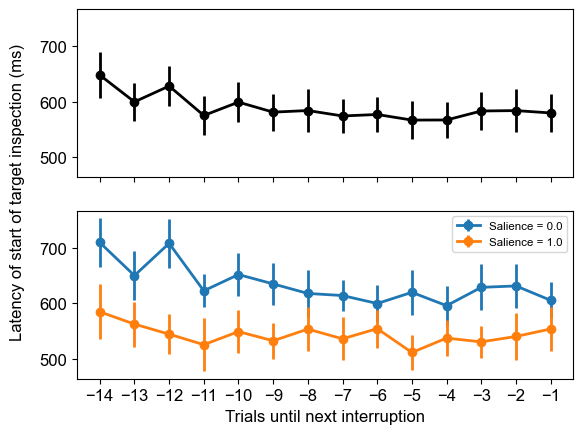

In [37]:
#### PLOT TARGET INSPECTION LATENCY ================================
fig, ax = plt.subplots(2,1, sharex=True, sharey=True)

per_ppt = rt_data.groupby(['ppt','since_last_interr'])['target_inspect_start'].mean().reset_index()

group_mean = per_ppt.groupby('since_last_interr')['target_inspect_start'].mean()
group_sem  = per_ppt.groupby('since_last_interr')['target_inspect_start'].sem()

ax[0].errorbar(x=group_mean.index, y=group_mean.values, yerr=group_sem.values, marker='o', linestyle='-', color='black', linewidth=2, label='group mean')

per_ppt_by_sal = rt_data.groupby(['salience','ppt','since_last_interr'])['target_inspect_start'].mean().reset_index()

for salience_value in sorted(rt_data['salience'].unique()):
    subset = per_ppt_by_sal[per_ppt_by_sal['salience'] == salience_value]
    mean_by_bin = subset.groupby('since_last_interr')['target_inspect_start'].mean()
    sem_by_bin  = subset.groupby('since_last_interr')['target_inspect_start'].sem()
    ax[1].errorbar(x=mean_by_bin.index, y=mean_by_bin.values, yerr=sem_by_bin.values, marker='o', linestyle='-', linewidth=2, label=f'Salience = {salience_value}')

ax[1].set_xlabel('Trials since last interruption')
# ax[1].set_ylabel('Latency of start of target inspection (ms)')
ax[1].set_xticks(range(1,15))
ax[1].legend(fontsize='x-small')
fig.text(0.02, 0.5, 'Latency of start of target inspection (ms)', va='center', rotation='vertical')

# ===========================================================

fig, ax = plt.subplots(2,1, sharex=True, sharey=True)

per_ppt = rt_data.groupby(['ppt','until_next_interr'])['target_inspect_start'].mean().reset_index()

group_mean = per_ppt.groupby('until_next_interr')['target_inspect_start'].mean()
group_sem  = per_ppt.groupby('until_next_interr')['target_inspect_start'].sem()

ax[0].errorbar(x=group_mean.index, y=group_mean.values, yerr=group_sem.values, marker='o', linestyle='-', color='black', linewidth=2, label='group mean')

per_ppt_by_sal = rt_data.groupby(['salience','ppt','until_next_interr'])['target_inspect_start'].mean().reset_index()

for salience_value in sorted(rt_data['salience'].unique()):
    subset = per_ppt_by_sal[per_ppt_by_sal['salience'] == salience_value]
    mean_by_bin = subset.groupby('until_next_interr')['target_inspect_start'].mean()
    sem_by_bin  = subset.groupby('until_next_interr')['target_inspect_start'].sem()
    ax[1].errorbar(x=mean_by_bin.index, y=mean_by_bin.values, yerr=sem_by_bin.values, marker='o', linestyle='-', linewidth=2, label=f'Salience = {salience_value}')

ax[1].set_xlabel('Trials until next interruption')
# ax[1].set_ylabel('Latency of start of target inspection (ms)')
ax[1].set_xticks(range(-14,0))
ax[1].legend(fontsize='x-small')
fig.text(0.02, 0.5, 'Latency of start of target inspection (ms)', va='center', rotation='vertical')

Text(0.02, 0.5, 'RT (ms)')

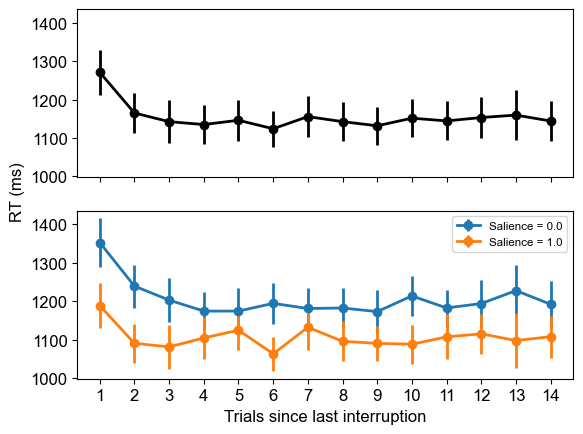

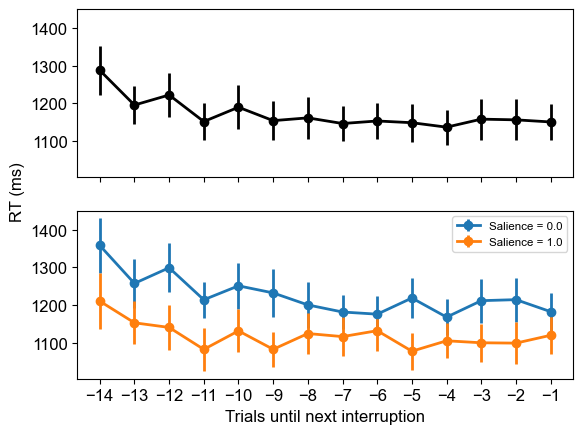

In [38]:
##### PLOT RT ====================================

fig, ax = plt.subplots(2,1, sharex=True, sharey=True)

per_ppt = rt_data.groupby(['ppt','since_last_interr'])['rt'].mean().reset_index()

group_mean = per_ppt.groupby('since_last_interr')['rt'].mean()
group_sem  = per_ppt.groupby('since_last_interr')['rt'].sem()

ax[0].errorbar(x=group_mean.index, y=group_mean.values, yerr=group_sem.values, marker='o', linestyle='-', color='black', linewidth=2, label='group mean')

per_ppt_by_sal = rt_data.groupby(['salience','ppt','since_last_interr'])['rt'].mean().reset_index()

for salience_value in sorted(rt_data['salience'].unique()):
    subset = per_ppt_by_sal[per_ppt_by_sal['salience'] == salience_value]
    mean_by_bin = subset.groupby('since_last_interr')['rt'].mean()
    sem_by_bin  = subset.groupby('since_last_interr')['rt'].sem()
    ax[1].errorbar(x=mean_by_bin.index, y=mean_by_bin.values, yerr=sem_by_bin.values, marker='o', linestyle='-', linewidth=2, label=f'Salience = {salience_value}')

ax[1].set_xlabel('Trials since last interruption')
# ax[1].set_ylabel('Latency of first saccade from fixation (ms)')
ax[1].set_xticks(range(1,15))
ax[1].legend(fontsize='x-small')
fig.text(0.02, 0.5, 'RT (ms)', va='center', rotation='vertical')

# ===========================================================

fig, ax = plt.subplots(2,1, sharex=True, sharey=True)

per_ppt = rt_data.groupby(['ppt','until_next_interr'])['rt'].mean().reset_index()

group_mean = per_ppt.groupby('until_next_interr')['rt'].mean()
group_sem  = per_ppt.groupby('until_next_interr')['rt'].sem()

ax[0].errorbar(x=group_mean.index, y=group_mean.values, yerr=group_sem.values, marker='o', linestyle='-', color='black', linewidth=2, label='group mean')

per_ppt_by_sal = rt_data.groupby(['salience','ppt','until_next_interr'])['rt'].mean().reset_index()

for salience_value in sorted(rt_data['salience'].unique()):
    subset = per_ppt_by_sal[per_ppt_by_sal['salience'] == salience_value]
    mean_by_bin = subset.groupby('until_next_interr')['rt'].mean()
    sem_by_bin  = subset.groupby('until_next_interr')['rt'].sem()
    ax[1].errorbar(x=mean_by_bin.index, y=mean_by_bin.values, yerr=sem_by_bin.values, marker='o', linestyle='-', linewidth=2, label=f'Salience = {salience_value}')

ax[1].set_xlabel('Trials until next interruption')
# ax[1].set_ylabel('Latency of first saccade from fixation (ms)')
ax[1].set_xticks(range(-14,0))
ax[1].legend(fontsize='x-small')
fig.text(0.02, 0.5, 'RT (ms)', va='center', rotation='vertical')

Text(0.02, 0.5, 'Proportion of target first trials')

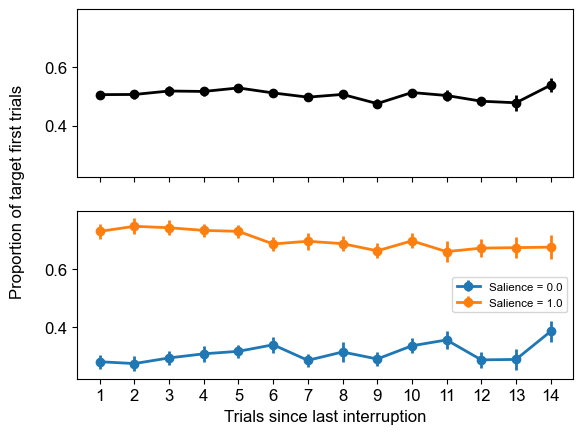

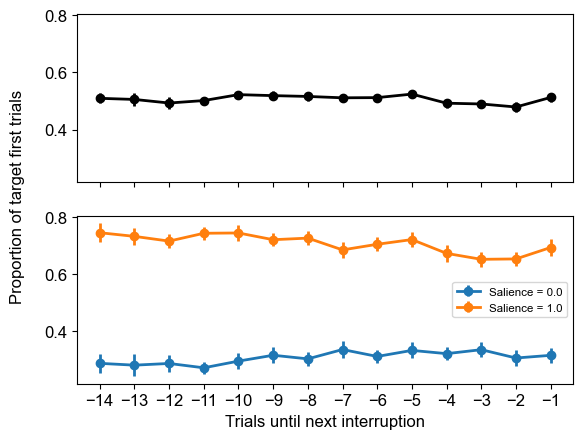

In [39]:
##### PLOT PROPORTION TARGET FIRST ====================================

fig, ax = plt.subplots(2,1, sharex=True, sharey=True)

per_ppt = rt_data.groupby(['ppt','since_last_interr'])['target_first'].mean().reset_index()

group_mean = per_ppt.groupby('since_last_interr')['target_first'].mean()
group_sem  = per_ppt.groupby('since_last_interr')['target_first'].sem()

ax[0].errorbar(x=group_mean.index, y=group_mean.values, yerr=group_sem.values, marker='o', linestyle='-', color='black', linewidth=2, label='group mean')

per_ppt_by_sal = rt_data.groupby(['salience','ppt','since_last_interr'])['target_first'].mean().reset_index()

for salience_value in sorted(rt_data['salience'].unique()):
    subset = per_ppt_by_sal[per_ppt_by_sal['salience'] == salience_value]
    mean_by_bin = subset.groupby('since_last_interr')['target_first'].mean()
    sem_by_bin  = subset.groupby('since_last_interr')['target_first'].sem()
    ax[1].errorbar(x=mean_by_bin.index, y=mean_by_bin.values, yerr=sem_by_bin.values, marker='o', linestyle='-', linewidth=2, label=f'Salience = {salience_value}')

ax[1].set_xlabel('Trials since last interruption')
# ax[1].set_ylabel('Latency of first saccade from fixation (ms)')
ax[1].set_xticks(range(1,15))
ax[1].legend(fontsize='x-small')
fig.text(0.02, 0.5, 'Proportion of target first trials', va='center', rotation='vertical')

# ===========================================================

fig, ax = plt.subplots(2,1, sharex=True, sharey=True)

per_ppt = rt_data.groupby(['ppt','until_next_interr'])['target_first'].mean().reset_index()

group_mean = per_ppt.groupby('until_next_interr')['target_first'].mean()
group_sem  = per_ppt.groupby('until_next_interr')['target_first'].sem()

ax[0].errorbar(x=group_mean.index, y=group_mean.values, yerr=group_sem.values, marker='o', linestyle='-', color='black', linewidth=2, label='group mean')

per_ppt_by_sal = rt_data.groupby(['salience','ppt','until_next_interr'])['target_first'].mean().reset_index()

for salience_value in sorted(rt_data['salience'].unique()):
    subset = per_ppt_by_sal[per_ppt_by_sal['salience'] == salience_value]
    mean_by_bin = subset.groupby('until_next_interr')['target_first'].mean()
    sem_by_bin  = subset.groupby('until_next_interr')['target_first'].sem()
    ax[1].errorbar(x=mean_by_bin.index, y=mean_by_bin.values, yerr=sem_by_bin.values, marker='o', linestyle='-', linewidth=2, label=f'Salience = {salience_value}')

ax[1].set_xlabel('Trials until next interruption')
# ax[1].set_ylabel('Latency of first saccade from fixation (ms)')
ax[1].set_xticks(range(-14,0))
ax[1].legend(fontsize='x-small')
fig.text(0.02, 0.5, 'Proportion of target first trials', va='center', rotation='vertical')

Text(0.02, 0.5, 'Proportion correct (keypress)')

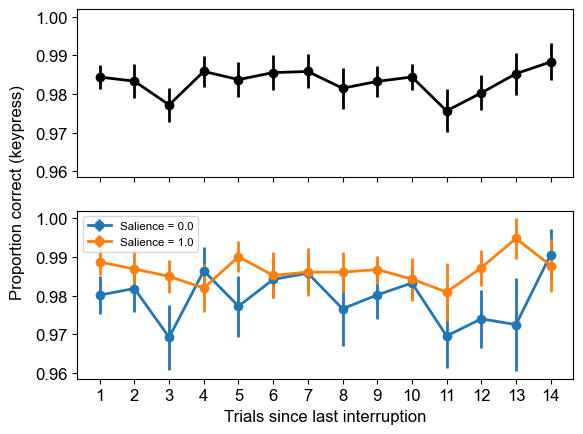

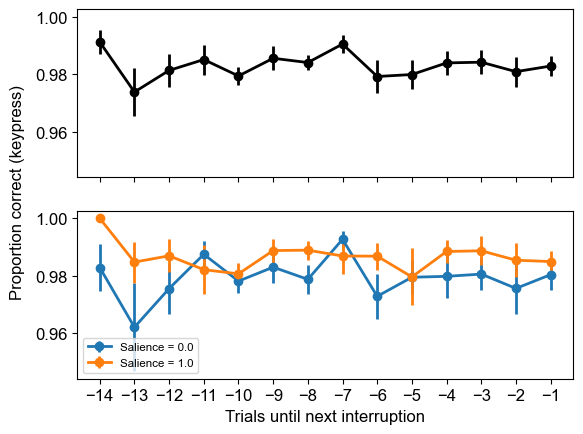

In [40]:
##### PLOT accuracy ====================================

fig, ax = plt.subplots(2,1, sharex=True, sharey=True)

# grouped_all = sum_stats_grouped(acc_data, 'accuracy', 'since_last_interr')
# # ax[0].plot(sum_stats_grouped(acc_data, 'accuracy', 'since_last_interr')['mean'], marker='o', linestyle='-', color='black', linewidth=2, label='group mean')
# ax[0].errorbar(x=grouped_all.index,    y=grouped_all['mean'],    yerr=grouped_all['sem'],    marker='o',    linestyle='-',    color='black',    linewidth=2,    label='group mean')
# ax[0].set_xticks(range(1,15))

# for salience_value in acc_data['salience'].unique():
#     subset = acc_data[acc_data['salience'] == salience_value]
#     grouped = sum_stats_grouped(subset, 'accuracy', 'since_last_interr')
#     # ax[1].plot(grouped['mean'], marker='o', linestyle='-', linewidth=2, label=f'Salience = {salience_value}')
#     ax[1].errorbar(x=grouped.index,    y=grouped['mean'],    yerr=grouped['sem'],    marker='o',    linestyle='-',    linewidth=2,    label=f'Salience = {salience_value}')

per_ppt = acc_data.groupby(['ppt','since_last_interr'])['accuracy'].mean().reset_index()

group_mean = per_ppt.groupby('since_last_interr')['accuracy'].mean()
group_sem  = per_ppt.groupby('since_last_interr')['accuracy'].sem()

ax[0].errorbar(x=group_mean.index, y=group_mean.values, yerr=group_sem.values, marker='o', linestyle='-', color='black', linewidth=2, label='group mean')

per_ppt_by_sal = acc_data.groupby(['salience','ppt','since_last_interr'])['accuracy'].mean().reset_index()

for salience_value in sorted(acc_data['salience'].unique()):
    subset = per_ppt_by_sal[per_ppt_by_sal['salience'] == salience_value]
    mean_by_bin = subset.groupby('since_last_interr')['accuracy'].mean()
    sem_by_bin  = subset.groupby('since_last_interr')['accuracy'].sem()
    ax[1].errorbar(x=mean_by_bin.index, y=mean_by_bin.values, yerr=sem_by_bin.values, marker='o', linestyle='-', linewidth=2, label=f'Salience = {salience_value}')

ax[1].set_xlabel('Trials since last interruption')
# ax[1].set_ylabel('Latency of first saccade from fixation (ms)')
ax[1].set_xticks(range(1,15))
ax[1].legend(fontsize='x-small')
fig.text(0.02, 0.5, 'Proportion correct (keypress)', va='center', rotation='vertical')

# ===========================================================

fig, ax = plt.subplots(2,1, sharex=True, sharey=True)

# grouped_all = sum_stats_grouped(acc_data, 'accuracy', 'until_next_interr')
# # ax[0].plot(sum_stats_grouped(acc_data, 'accuracy', 'until_next_interr')['mean'], marker='o', linestyle='-', color='black', linewidth=2, label='group mean')
# ax[0].errorbar(x=grouped_all.index,    y=grouped_all['mean'],    yerr=grouped_all['sem'],    marker='o',    linestyle='-',    color='black',    linewidth=2,    label='group mean')
# # ax[0].set_xticks(range(1,15))

# for salience_value in acc_data['salience'].unique():
#     subset = acc_data[acc_data['salience'] == salience_value]
#     grouped = sum_stats_grouped(subset, 'accuracy', 'until_next_interr')
#     # ax[1].plot(grouped['mean'], marker='o', linestyle='-', linewidth=2, label=f'Salience = {salience_value}')
#     ax[1].errorbar(x=grouped.index,    y=grouped['mean'],    yerr=grouped['sem'],    marker='o',    linestyle='-',    linewidth=2,    label=f'Salience = {salience_value}')
# per_ppt = acc_data.groupby(['ppt','since_last_interr'])['accuracy'].mean().reset_index()

per_ppt = acc_data.groupby(['ppt','until_next_interr'])['accuracy'].mean().reset_index()

group_mean = per_ppt.groupby('until_next_interr')['accuracy'].mean()
group_sem  = per_ppt.groupby('until_next_interr')['accuracy'].sem()

ax[0].errorbar(x=group_mean.index, y=group_mean.values, yerr=group_sem.values, marker='o', linestyle='-', color='black', linewidth=2, label='group mean')

per_ppt_by_sal = acc_data.groupby(['salience','ppt','until_next_interr'])['accuracy'].mean().reset_index()

for salience_value in sorted(acc_data['salience'].unique()):
    subset = per_ppt_by_sal[per_ppt_by_sal['salience'] == salience_value]
    mean_by_bin = subset.groupby('until_next_interr')['accuracy'].mean()
    sem_by_bin  = subset.groupby('until_next_interr')['accuracy'].sem()
    ax[1].errorbar(x=mean_by_bin.index, y=mean_by_bin.values, yerr=sem_by_bin.values, marker='o', linestyle='-', linewidth=2, label=f'Salience = {salience_value}')

ax[1].set_xlabel('Trials until next interruption')
# ax[1].set_ylabel('Latency of first saccade from fixation (ms)')
ax[1].set_xticks(range(-14,0))
ax[1].legend(fontsize='x-small')
fig.text(0.02, 0.5, 'Proportion correct (keypress)', va='center', rotation='vertical')

Text(0.02, 0.5, 'Number of fixations (total, nonconsecutive)')

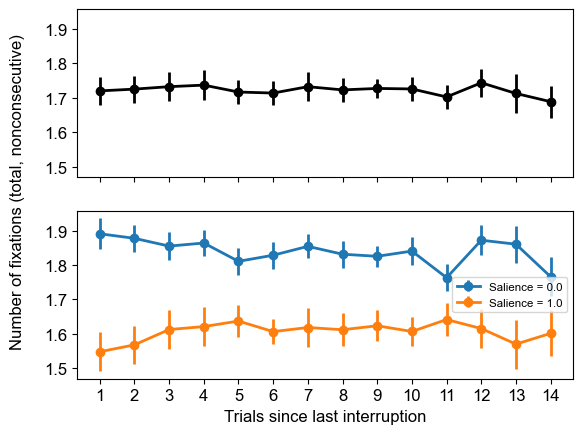

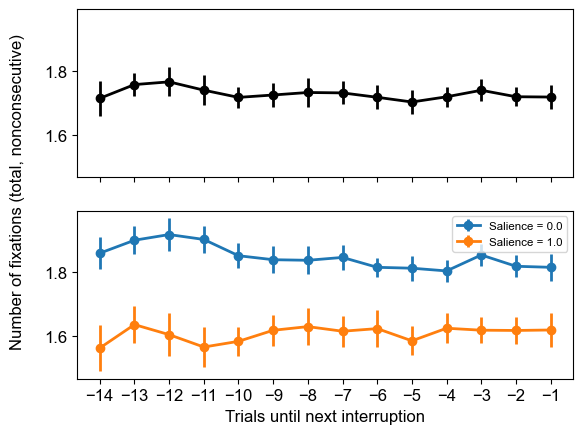

In [41]:
##### PLOT n fixations ====================================

fig, ax = plt.subplots(2,1, sharex=True, sharey=True)

per_ppt = rt_data.groupby(['ppt','since_last_interr'])['tot_n_fix'].mean().reset_index()

group_mean = per_ppt.groupby('since_last_interr')['tot_n_fix'].mean()
group_sem  = per_ppt.groupby('since_last_interr')['tot_n_fix'].sem()

ax[0].errorbar(x=group_mean.index, y=group_mean.values, yerr=group_sem.values, marker='o', linestyle='-', color='black', linewidth=2, label='group mean')

per_ppt_by_sal = rt_data.groupby(['salience','ppt','since_last_interr'])['tot_n_fix'].mean().reset_index()

for salience_value in sorted(rt_data['salience'].unique()):
    subset = per_ppt_by_sal[per_ppt_by_sal['salience'] == salience_value]
    mean_by_bin = subset.groupby('since_last_interr')['tot_n_fix'].mean()
    sem_by_bin  = subset.groupby('since_last_interr')['tot_n_fix'].sem()
    ax[1].errorbar(x=mean_by_bin.index, y=mean_by_bin.values, yerr=sem_by_bin.values, marker='o', linestyle='-', linewidth=2, label=f'Salience = {salience_value}')

ax[1].set_xlabel('Trials since last interruption')
# ax[1].set_ylabel('Latency of first saccade from fixation (ms)')
ax[1].set_xticks(range(1,15))
ax[1].legend(fontsize='x-small')
fig.text(0.02, 0.5, 'Number of fixations (total, nonconsecutive)', va='center', rotation='vertical')

# ===========================================================

fig, ax = plt.subplots(2,1, sharex=True, sharey=True)

per_ppt = rt_data.groupby(['ppt','until_next_interr'])['tot_n_fix'].mean().reset_index()

group_mean = per_ppt.groupby('until_next_interr')['tot_n_fix'].mean()
group_sem  = per_ppt.groupby('until_next_interr')['tot_n_fix'].sem()

ax[0].errorbar(x=group_mean.index, y=group_mean.values, yerr=group_sem.values, marker='o', linestyle='-', color='black', linewidth=2, label='group mean')

per_ppt_by_sal = rt_data.groupby(['salience','ppt','until_next_interr'])['tot_n_fix'].mean().reset_index()

for salience_value in sorted(rt_data['salience'].unique()):
    subset = per_ppt_by_sal[per_ppt_by_sal['salience'] == salience_value]
    mean_by_bin = subset.groupby('until_next_interr')['tot_n_fix'].mean()
    sem_by_bin  = subset.groupby('until_next_interr')['tot_n_fix'].sem()
    ax[1].errorbar(x=mean_by_bin.index, y=mean_by_bin.values, yerr=sem_by_bin.values, marker='o', linestyle='-', linewidth=2, label=f'Salience = {salience_value}')

ax[1].set_xlabel('Trials until next interruption')
# ax[1].set_ylabel('Latency of first saccade from fixation (ms)')
ax[1].set_xticks(range(-14,0))
ax[1].legend(fontsize='x-small')
fig.text(0.02, 0.5, 'Number of fixations (total, nonconsecutive)', va='center', rotation='vertical')

In [67]:
# pivot rt and acc data for anovas
rt_data_pivot = rt_data.pivot_table(index='ppt', columns=['salience', 'since_last_interr'], values='rt', aggfunc='mean')
acc_data_pivot = acc_data.pivot_table(index='ppt', columns=['salience', 'since_last_interr'], values='accuracy', aggfunc='mean')

# flatten multiindex column names and remove decimals
rt_data_pivot.columns = ['_'.join([str(int(c)) if float(c).is_integer() else str(c) for c in col]) for col in rt_data_pivot.columns]
acc_data_pivot.columns = ['_'.join([str(int(c)) if float(c).is_integer() else str(c) for c in col]) for col in acc_data_pivot.columns]

# rename salient and nonsalient post interr columns
rt_data_pivot = rt_data_pivot.rename(columns={'0_1': 'nonsalient_post', '1_1': 'salient_post'})
acc_data_pivot = acc_data_pivot.rename(columns={'0_1': 'nonsalient_post', '1_1': 'salient_post'})
# print("After rename:", rt_data_pivot.columns.tolist())

# add column to that takes average of since_last_interr is 5-10 for both salience levels
rt_data_pivot['nonsalient_pre'] = rt_data_pivot[[col for col in rt_data_pivot.columns if col.startswith('0_') and int(col.split('_')[1]) in range(5,11)]].mean(axis=1)
rt_data_pivot['salient_pre'] = rt_data_pivot[[col for col in rt_data_pivot.columns if col.startswith('1_') and int(col.split('_')[1]) in range(5,11)]].mean(axis=1)

acc_data_pivot['nonsalient_pre'] = acc_data_pivot[[col for col in acc_data_pivot.columns if col.startswith('0_') and int(col.split('_')[1]) in range(5,11)]].mean(axis=1)
acc_data_pivot['salient_pre'] = acc_data_pivot[[col for col in acc_data_pivot.columns if col.startswith('1_') and int(col.split('_')[1]) in range(5,11)]].mean(axis=1)

# save pivoted datasets to csv for jasp
rt_data_pivot.to_csv('/Users/camillaucheomaenwereuzor/Desktop/Coding/Data analysis/rt_data_pivot.csv')
acc_data_pivot.to_csv('/Users/camillaucheomaenwereuzor/Desktop/Coding/Data analysis/acc_data_pivot.csv')


In [66]:
# pivot data for anovas
target_first_pivot_pivot = rt_data.pivot_table(index='ppt', columns=['salience', 'since_last_interr'], values='target_first', aggfunc='mean')
latency_tgt_fix_pivot = acc_data.pivot_table(index='ppt', columns=['salience', 'since_last_interr'], values='first_tgt_fix_latency', aggfunc='mean')
search_start_latency = acc_data.pivot_table(index='ppt', columns=['salience', 'since_last_interr'], values='first_sacc_to_item_latency', aggfunc='mean')
nfix_pivot = rt_data.pivot_table(index='ppt', columns=['salience', 'since_last_interr'], values='tot_n_fix', aggfunc='mean')

# flatten multiindex column names and remove decimals
target_first_pivot_pivot.columns = ['_'.join([str(int(c)) if float(c).is_integer() else str(c) for c in col]) for col in target_first_pivot_pivot.columns]
latency_tgt_fix_pivot.columns = ['_'.join([str(int(c)) if float(c).is_integer() else str(c) for c in col]) for col in latency_tgt_fix_pivot.columns]
search_start_latency.columns = ['_'.join([str(int(c)) if float(c).is_integer() else str(c) for c in col]) for col in search_start_latency.columns]
nfix_pivot.columns = ['_'.join([str(int(c)) if float(c).is_integer() else str(c) for c in col]) for col in nfix_pivot.columns]

# rename salient and nonsalient post interr columns
target_first_pivot_pivot = target_first_pivot_pivot.rename(columns={'0_1': 'nonsalient_post', '1_1': 'salient_post'})
latency_tgt_fix_pivot = latency_tgt_fix_pivot.rename(columns={'0_1': 'nonsalient_post', '1_1': 'salient_post'})
search_start_latency = search_start_latency.rename(columns={'0_1': 'nonsalient_post', '1_1': 'salient_post'})
nfix_pivot = nfix_pivot.rename(columns={'0_1': 'nonsalient_post', '1_1': 'salient_post'})
# print("After rename:", rt_data_pivot.columns.tolist())

# add column to that takes average of since_last_interr is 5-10 for both salience levels
target_first_pivot_pivot['nonsalient_pre'] = target_first_pivot_pivot[[col for col in target_first_pivot_pivot.columns if col.startswith('0_') and int(col.split('_')[1]) in range(5,11)]].mean(axis=1)
target_first_pivot_pivot['salient_pre'] = target_first_pivot_pivot[[col for col in target_first_pivot_pivot.columns if col.startswith('1_') and int(col.split('_')[1]) in range(5,11)]].mean(axis=1)

latency_tgt_fix_pivot['nonsalient_pre'] = latency_tgt_fix_pivot[[col for col in latency_tgt_fix_pivot.columns if col.startswith('0_') and int(col.split('_')[1]) in range(5,11)]].mean(axis=1)
latency_tgt_fix_pivot['salient_pre'] = latency_tgt_fix_pivot[[col for col in latency_tgt_fix_pivot.columns if col.startswith('1_') and int(col.split('_')[1]) in range(5,11)]].mean(axis=1)

search_start_latency['nonsalient_pre'] = search_start_latency[[col for col in search_start_latency.columns if col.startswith('0_') and int(col.split('_')[1]) in range(5,11)]].mean(axis=1)
search_start_latency['salient_pre'] = search_start_latency[[col for col in search_start_latency.columns if col.startswith('1_') and int(col.split('_')[1]) in range(5,11)]].mean(axis=1)

nfix_pivot['nonsalient_pre'] = nfix_pivot[[col for col in nfix_pivot.columns if col.startswith('0_') and int(col.split('_')[1]) in range(5,11)]].mean(axis=1)
nfix_pivot['salient_pre'] = nfix_pivot[[col for col in nfix_pivot.columns if col.startswith('1_') and int(col.split('_')[1]) in range(5,11)]].mean(axis=1)
    
# save pivoted datasets to csv for jasp
target_first_pivot_pivot.to_csv('/Users/camillaucheomaenwereuzor/Desktop/Coding/Data analysis/target_first_pivot_pivot.csv')
latency_tgt_fix_pivot.to_csv('/Users/camillaucheomaenwereuzor/Desktop/Coding/Data analysis/latency_tgt_fix_pivot.csv')
search_start_latency.to_csv('/Users/camillaucheomaenwereuzor/Desktop/Coding/Data analysis/search_start_latency.csv')
nfix_pivot.to_csv('/Users/camillaucheomaenwereuzor/Desktop/Coding/Data analysis/nfix_pivot.csv')

In [45]:
rt_data_pivot['salience_eff_pre'] = rt_data_pivot['nonsalient_pre'] - rt_data_pivot['salient_pre']
rt_data_pivot['salience_eff_post'] = rt_data_pivot['nonsalient_post'] - rt_data_pivot['salient_post']
print(rt_data_pivot[['salience_eff_pre', 'salience_eff_post']].describe())

rt_data_pivot['salience_eff_pre'] = abs(rt_data_pivot['nonsalient_pre'] - rt_data_pivot['salient_pre'])
rt_data_pivot['salience_eff_post'] = abs(rt_data_pivot['nonsalient_post'] - rt_data_pivot['salient_post'])
print(rt_data_pivot[['salience_eff_pre', 'salience_eff_post']].describe())

       salience_eff_pre  salience_eff_post
count         24.000000          24.000000
mean          87.492255         164.157415
std           91.130178         151.746620
min          -51.018801        -126.368700
25%           42.779121          71.255049
50%           77.261617         142.500000
75%          106.253622         249.663793
max          380.111238         471.243386
       salience_eff_pre  salience_eff_post
count         24.000000          24.000000
mean          93.238744         182.287011
std           84.976382         128.347407
min            0.063980          25.307882
25%           45.655449          87.699713
50%           77.261617         142.500000
75%          106.253622         249.663793
max          380.111238         471.243386


<ErrorbarContainer object of 3 artists>

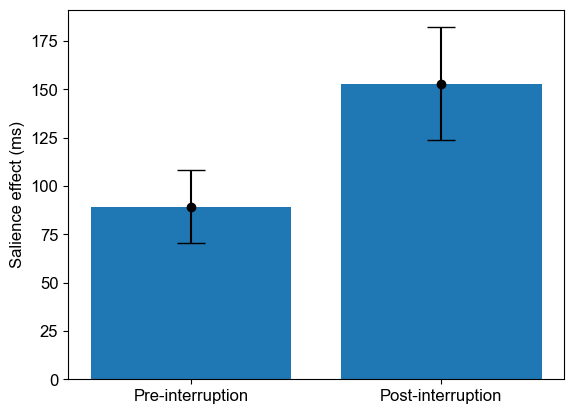

In [69]:
fig, ax = plt.subplots(1,1)

x = ['Pre-interruption', 'Post-interruption']
rt_data_pivot['salience_eff_pre'] = rt_data_pivot['nonsalient_pre'] - rt_data_pivot['salient_pre']
rt_data_pivot['salience_eff_post'] = rt_data_pivot['nonsalient_post'] - rt_data_pivot['salient_post']
y = [rt_data_pivot['salience_eff_pre'].mean(), rt_data_pivot['salience_eff_post'].mean()]

ax.bar(x, y)
ax.set_ylabel('Salience effect (ms)')

err = [rt_data_pivot['salience_eff_pre'].sem(), rt_data_pivot['salience_eff_post'].sem()]
ax.errorbar(x, y, yerr=err, fmt='o', color="black", capsize=10)

/var/folders/vv/kskj65k95slgwj3hqk0449wr0000gp/T/ipykernel_6701/2653266437.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  per_ppt = (data.groupby(['ppt','lat_bin', 'salience'])['target_first'].mean().reset_index())
/var/folders/vv/kskj65k95slgwj3hqk0449wr0000gp/T/ipykernel_6701/2653266437.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = (per_ppt.groupby(['lat_bin', 'salience'])['target_first'].agg(['mean','sem']).reset_index())
/var/folders/vv/kskj65k95slgwj3hqk0449wr0000gp/T/ipykernel_6701/2653266437.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to 

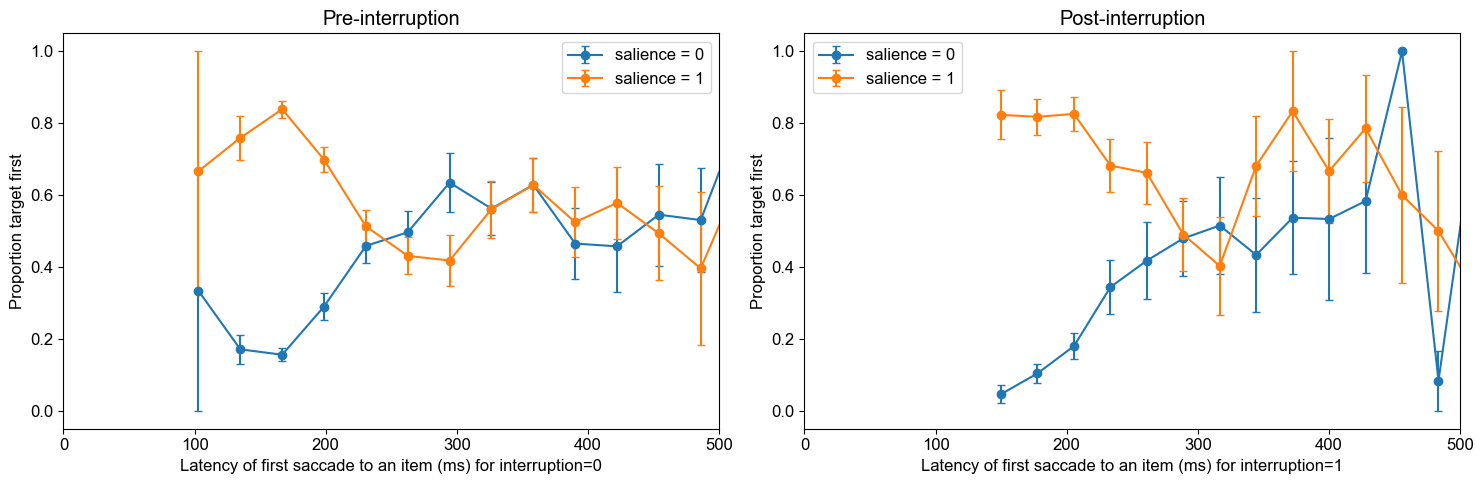

In [68]:
fig, ax = plt.subplots(1,2, sharex=True, figsize=(15,5))

import numpy as np

for inter in [0,1]:

    ax[int(inter)].set_xlabel(f'Latency of first saccade to an item (ms) for interruption={int(inter)}')
    data = rt_data.copy()

    if inter == 0:
        data = data[(data['since_last_interr'].between(5,10))]
        data = data.dropna(subset=['first_sacc_latency','target_first'])

        hist, mybins = np.histogram(data['first_sacc_latency'], bins=60)
        data['lat_bin'] = pd.cut(data['first_sacc_latency'], bins=mybins, right=False, duplicates='raise')

        per_ppt = (data.groupby(['ppt','lat_bin', 'salience'])['target_first'].mean().reset_index())
        grouped = (per_ppt.groupby(['lat_bin', 'salience'])['target_first'].agg(['mean','sem']).reset_index())

    else:
        data = data[(data['since_last_interr'] == 1)]
        data = data.dropna(subset=['first_sacc_latency','target_first'])

        hist, mybins = np.histogram(data['first_sacc_latency'], bins=60)
        data['lat_bin'] = pd.cut(data['first_sacc_latency'], bins=mybins, right=False, duplicates='raise')

        per_ppt = (data.groupby(['ppt','lat_bin', 'salience'])['target_first'].mean().reset_index())
        grouped = (per_ppt.groupby(['lat_bin', 'salience'])['target_first'].agg(['mean','sem']).reset_index())
    
    for sal in sorted(grouped['salience'].unique()):
        
        g = grouped[grouped['salience']==sal].sort_values('lat_bin')
        centers = g['lat_bin'].apply(lambda b: b.left + (b.right - b.left)/2).astype(float)

        ax[int(inter)].errorbar(centers, g['mean'], yerr=g['sem'], marker='o', linestyle='-',
                capsize=3, label=f'salience = {int(sal)}')
    
    ax[int(inter)].set_ylabel('Proportion target first')
    ax[int(inter)].set_xlim(0,500)
    ax[int(inter)].legend()
    ax[int(inter)].set_title('Pre-interruption' if inter == 0 else 'Post-interruption')
    # ax[int(inter)].text(10, 0, f'Interruption = {int(inter)}', fontsize=12)
    # ax[int(inter)].text(10, 0, 'Pre-interruption' if inter == 0 else 'Post-interruption', fontsize=12)

plt.tight_layout()